In [1]:
# ライブラリのインポート
# keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
# MNISTデータセットをインポート
from keras.datasets import mnist
# NumPyをインポート
import numpy as np
# keras.modelsからSequentialをインポート
from keras.models import Sequential
# keras.layersからConv2D,MaxPooling2Dをインポート
from keras.layers import Conv2D, MaxPooling2D
# keras.layersからDense,Activation,Dropout,Flatten,Denseをインポート
from keras.layers import Activation, Dropout, Flatten, Dense
# keras.optimizersからAdamをインポート
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
## データセットの読み込みとデータの前処理

# MNISTデータセットの読み込み
(x_trains, y_trains), (x_tests, y_tests) = mnist.load_data()

# 訓練データ
# (60000, 28, 28)の3階テンソルを(60000, 28, 28, 1)の4階テンソルに変換
x_trains = x_trains.reshape(60000, 28, 28, 1)
x_trains = x_trains.astype('float32') # float32型に変換
x_trains /= 255                       # 0から1.0の範囲に変換
correct = 10                          # 正解ラベルの数
# 正解ラベルをワンホット表現に変換
y_trains = np_utils.to_categorical(y_trains, correct)

# テストデータ
# (10000, 28, 28)の3階テンソルを(10000, 28, 28, 1)の4階テンソルに変換
x_tests = x_tests.reshape(10000, 28, 28, 1)
x_tests = x_tests.astype('float32')   # float32型に変換
x_tests /= 255                        # 0から1.0の範囲に変換
# 正解ラベルをワンホット表現に変換
y_tests = np_utils.to_categorical(y_tests, correct)

In [3]:
## 畳み込みニューラルネットワーク
model = Sequential()                 # Sequentialオブジェクトの生成

# 畳み込み層
model.add(
    Conv2D(filters=10,               # フィルターの数は10
           kernel_size=(3, 3),       # 3×3のフィルターを使用
           padding='same',           # ゼロパディングを行う
           input_shape=(28, 28, 1),  # 入力データの形状                     
           activation='relu'         # 活性化関数はReLU
           ))

# Flatten層　(28, 28)から(784)に変換する
model.add(Flatten())

# 出力層
model.add(Dense(10,                  # 出力層のニューロン数は10
                activation='softmax' # 活性化関数はsoftmax
               ))

# オブジェクトのコンパイル
model.compile(
    loss='categorical_crossentropy', # 損失の基準は交差エントロピー誤差
    optimizer=Adam(),                # 最適化アルゴリズムはAdam
    metrics=['accuracy'])            # 学習評価として正解率を指定

model.summary()                      # サマリーを表示

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
flatten_1 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                78410     
Total params: 78,510
Trainable params: 78,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 学習を行って結果を出力
history = model.fit(
    x_trains,         # 訓練データ
    y_trains,         # 正解ラベル
    epochs=10,        # 学習を繰り返す回数
    batch_size=100,   # 勾配計算に用いるミニバッチの数
    verbose=1,        # 学習の進捗状況を出力する
    validation_data=(
    x_tests, y_tests  # テストデータの指定
    ))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.3267 - acc: 0.9119 - val_loss: 0.1473 - val_acc: 0.9589
Epoch 2/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.1184 - acc: 0.9667 - val_loss: 0.1001 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0811 - acc: 0.9769 - val_loss: 0.0747 - val_acc: 0.9773
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0641 - acc: 0.9821 - val_loss: 0.0712 - val_acc: 0.9776
Epoch 5/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0529 - acc: 0.9844 - val_loss: 0.0599 - val_acc: 0.9797
Epoch 6/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0449 - acc: 0.9869 - val_loss: 0.0593 - val_acc: 0.9820
Epoch 7/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0390 - acc: 0.9886 - val_loss: 0.

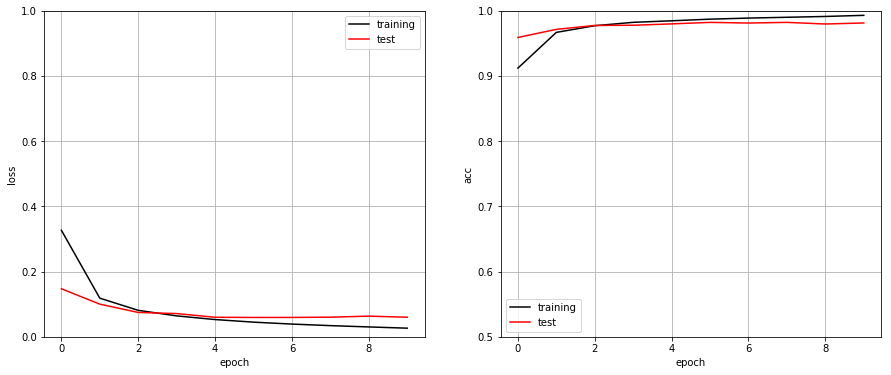

In [5]:
# 損失と正解率（精度）の推移をグラフにする

%matplotlib inline
import matplotlib.pyplot as plt

# プロット図のサイズを設定
plt.ﬁgure(ﬁgsize=(15, 6))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

# 1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル

# 1×2のグリッドの右(1,2,21)の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(history.history['acc'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_acc'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()